## About

This plot is a [multiple line chart](/line-chart), generally used to show the evolution of a variable over time. In our case, it displays the evolution of unemployment rates in different regions in the world. **Each line represents a region**, and the y-axis represents the unemployment rate.

It has been originally designed by [Joseph Barbier](https://www.barbierjoseph.com). Thanks to him for sharing his work!

As a teaser, here is the plot we’re gonna try building:

![small multiple linecharts](https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/animations/evolution-small-multiples.gif)


## Libraries

For creating this chart, we will need a whole bunch of libraries!

- [matplotlib](/matplotlib): to customize the appearance of the chart
- [pandas](/pandas): to handle the data
- [highlight_text](/advanced-custom-annotations-matplotlib) for the annotations


In [1]:
# data manipulation
import pandas as pd

# create the charts
import matplotlib.pyplot as plt

# annotations
from highlight_text import ax_text, fig_text

# custom fonts
from matplotlib import font_manager
from matplotlib.font_manager import FontProperties

# arrows
from matplotlib.patches import FancyArrowPatch

## Dataset

The data can be accessed using the **url below**.

The chart mainly relies on `df`, but `rent` and `rent_words` are used for **annotation purposes**.


In [2]:
path = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/economic_data.csv'

# open and clean dataset
df = pd.read_csv(path)

# convert to a date format
df['date'] = pd.to_datetime(df['date'])

# remove percentage sign and convert to float
col_to_update = ['unemployment rate', 'cpi yoy', 'core cpi', 'gdp yoy', 'interest rates']
for col in col_to_update:
   df[col] = df[col].str.replace('%', '').astype(float)

# display first rows
df.head()

,country,date,manufacturing pmi,services pmi,consumer confidence,interest rates,cpi yoy,core cpi,unemployment rate,gdp yoy,ticker,open,high,low,close
0,australia,2020-01-01,49.6,50.6,93.4,0.75,2.2,1.7,5.2,1.2,audusd,0.7021,0.7031,0.6682,0.6691
1,australia,2020-02-01,50.2,49.0,95.5,0.75,2.2,1.7,5.1,1.2,audusd,0.6690,0.6776,0.6434,0.6509
2,australia,2020-03-01,49.7,38.5,91.9,0.50,2.2,1.7,5.2,1.2,audusd,0.6488,0.6686,0.5507,0.6135
3,australia,2020-04-01,44.1,19.5,75.6,0.25,-0.3,1.2,6.3,-6.1,audusd,0.6133,0.6571,0.5979,0.6510
4,australia,2020-05-01,44.0,26.9,88.1,0.25,-0.3,1.2,7.0,-6.1,audusd,0.6511,0.6684,0.6371,0.6666


## Basic small multiples

Small multiples are a type of chart that shows the **same type of information** for **different categories**. In this case, we will create a small multiple of line charts, one for each category (country) in the dataset.

It's very important that the number of distinct values in the `category` (country in this case) is the **same as the number of subplots**. Otherwise, the plot will not be created correctly. In our case we have 9 countries/regions, so we will **create 9 subplots** (3 rows and 3 columns).


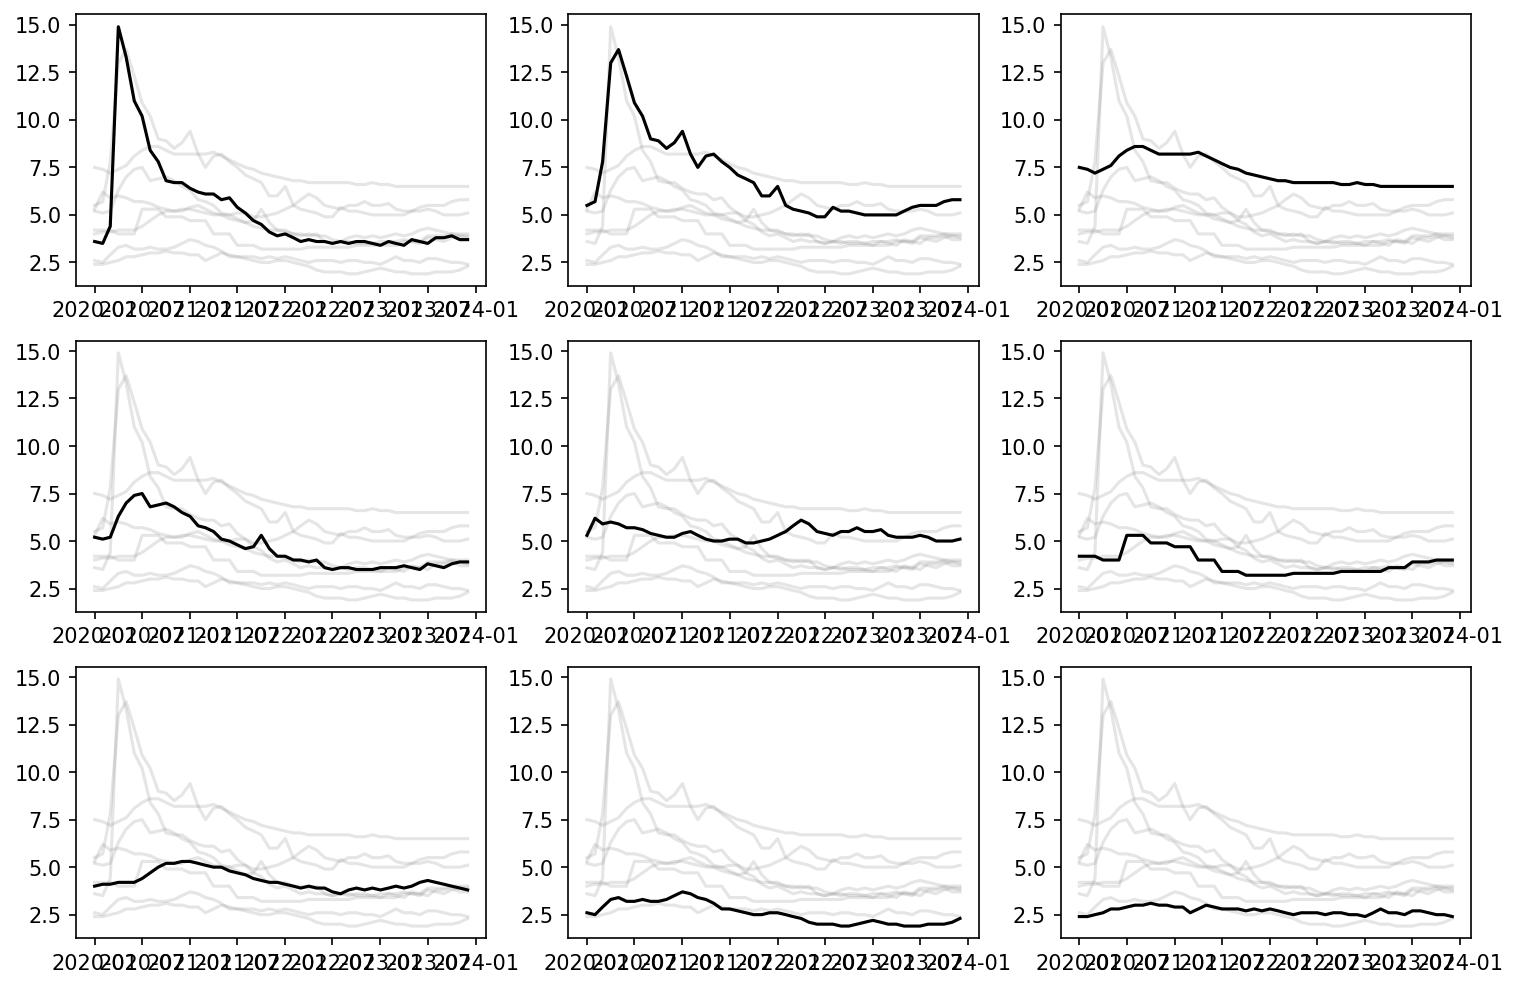

In [3]:
# parameters
dpi = 150
category = 'country'
year = 'date'
value = 'unemployment rate'

countries = df.groupby(category)[value].max().sort_values(ascending=False).index.tolist()

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 8), dpi=dpi)

for i, (group, ax) in enumerate(zip(countries, axs.flat)):

   # filter main and other groups
   filtered_df = df[df[category] == group]
   other_groups = df[category].unique()[df[category].unique() != group]

   # Plot other groups with lighter colors
   for other_group in other_groups:
      other_y = df[value][df[category] == other_group]
      other_x = df[year][df[category] == other_group]
      ax.plot(other_x, other_y, color='grey', alpha=0.2)

   # Plot the main group
   x = filtered_df[year]
   y = filtered_df[value]
   ax.plot(x, y, color='black')

plt.show()

## Customize axis

A simple way to make a chart more appealing is to **remove the axis**. This can be done using the `set_axis_off()` function.

We also specify the **y axis limits** by expanding the range a bit. This is done using the `set_ylim()` function.


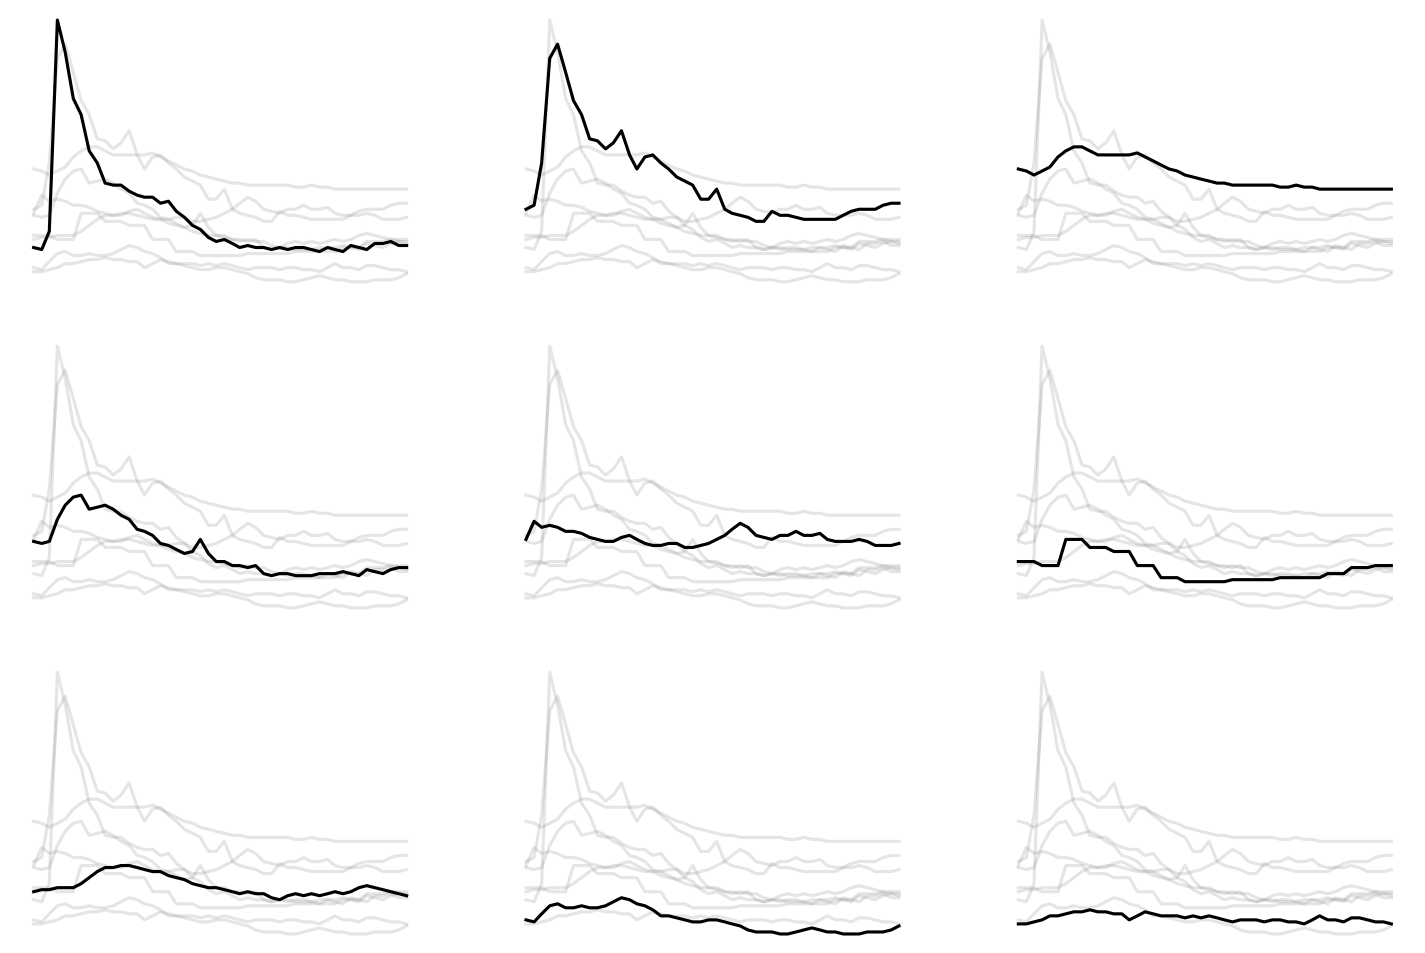

In [4]:
# parameters
dpi = 150
category = 'country'
year = 'date'
value = 'unemployment rate'

countries = df.groupby(category)[value].max().sort_values(ascending=False).index.tolist()

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 8), dpi=dpi)

for i, (group, ax) in enumerate(zip(countries, axs.flat)):

   # filter main and other groups
   filtered_df = df[df[category] == group]
   other_groups = df[category].unique()[df[category].unique() != group]

   # Plot other groups with lighter colors
   for other_group in other_groups:
      other_y = df[value][df[category] == other_group]
      other_x = df[year][df[category] == other_group]
      ax.plot(other_x, other_y, color='grey', alpha=0.2)

   # Plot the main group
   x = filtered_df[year]
   y = filtered_df[value]
   ax.plot(x, y, color='black')

   # Custom axes
   ax.set_axis_off()
   ax.set_ylim(df[value].min()-0.2, df[value].max()+0.3)

plt.show()

## Custom colors

In order to have a color per group we need to **define a list of colors** of the same length as the number of groups. In our case, we manually define 9 different colors. The colors are then accessed using the `colors[i]` syntax inside the `for` loop.

We also change the **background color** of the plot to make it more appealing.


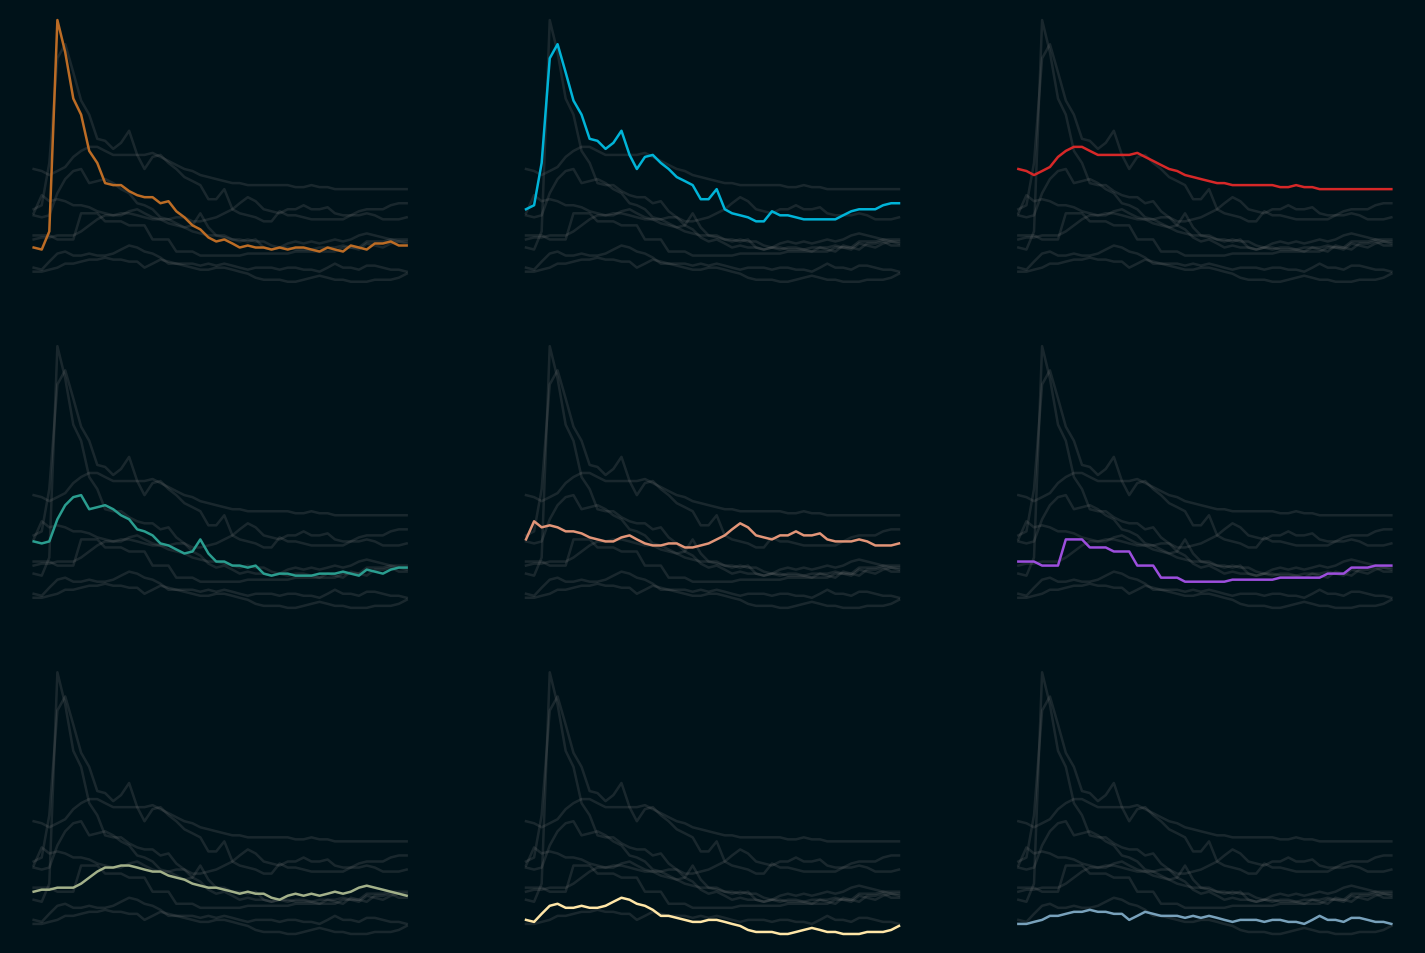

In [5]:
# parameters
dpi = 150
category = 'country'
year = 'date'
value = 'unemployment rate'
background_color = '#001219'
linewidth_main = 1.2
colors = [
    '#bc6c25','#00b4d8','#d62828',
    '#2a9d8f','#e29578','#9d4edd',
    '#a3b18a','#ffe6a7','#78a1bb'
]

# custom order for the countries
countries = df.groupby(category)[value].max().sort_values(ascending=False).index.tolist()

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 8), dpi=dpi)
fig.set_facecolor(background_color)

for i, (group, ax) in enumerate(zip(countries, axs.flat)):

   # Set the background color
   ax.set_facecolor(background_color)

   # filter main and other groups
   filtered_df = df[df[category] == group]
   other_groups = df[category].unique()[df[category].unique() != group]

   # Plot other groups with lighter colors
   for other_group in other_groups:
      other_y = df[value][df[category] == other_group]
      other_x = df[year][df[category] == other_group]
      ax.plot(other_x, other_y, color='grey', alpha=0.2, linewidth=linewidth_main)

   # Plot the main group
   x = filtered_df[year]
   y = filtered_df[value]
   ax.plot(x, y, color=colors[i], linewidth=linewidth_main, zorder=10)

   # Custom axes
   ax.set_axis_off()
   ax.set_ylim(df[value].min()-0.2, df[value].max()+0.3)

plt.show()

## Highligh first and last value

For each subplot, we will highlight the **first and last value** of the line. This is done by adding a **dot** at the first and last value of the line. We also add a **text annotation** next to the dot to make it more explicit.


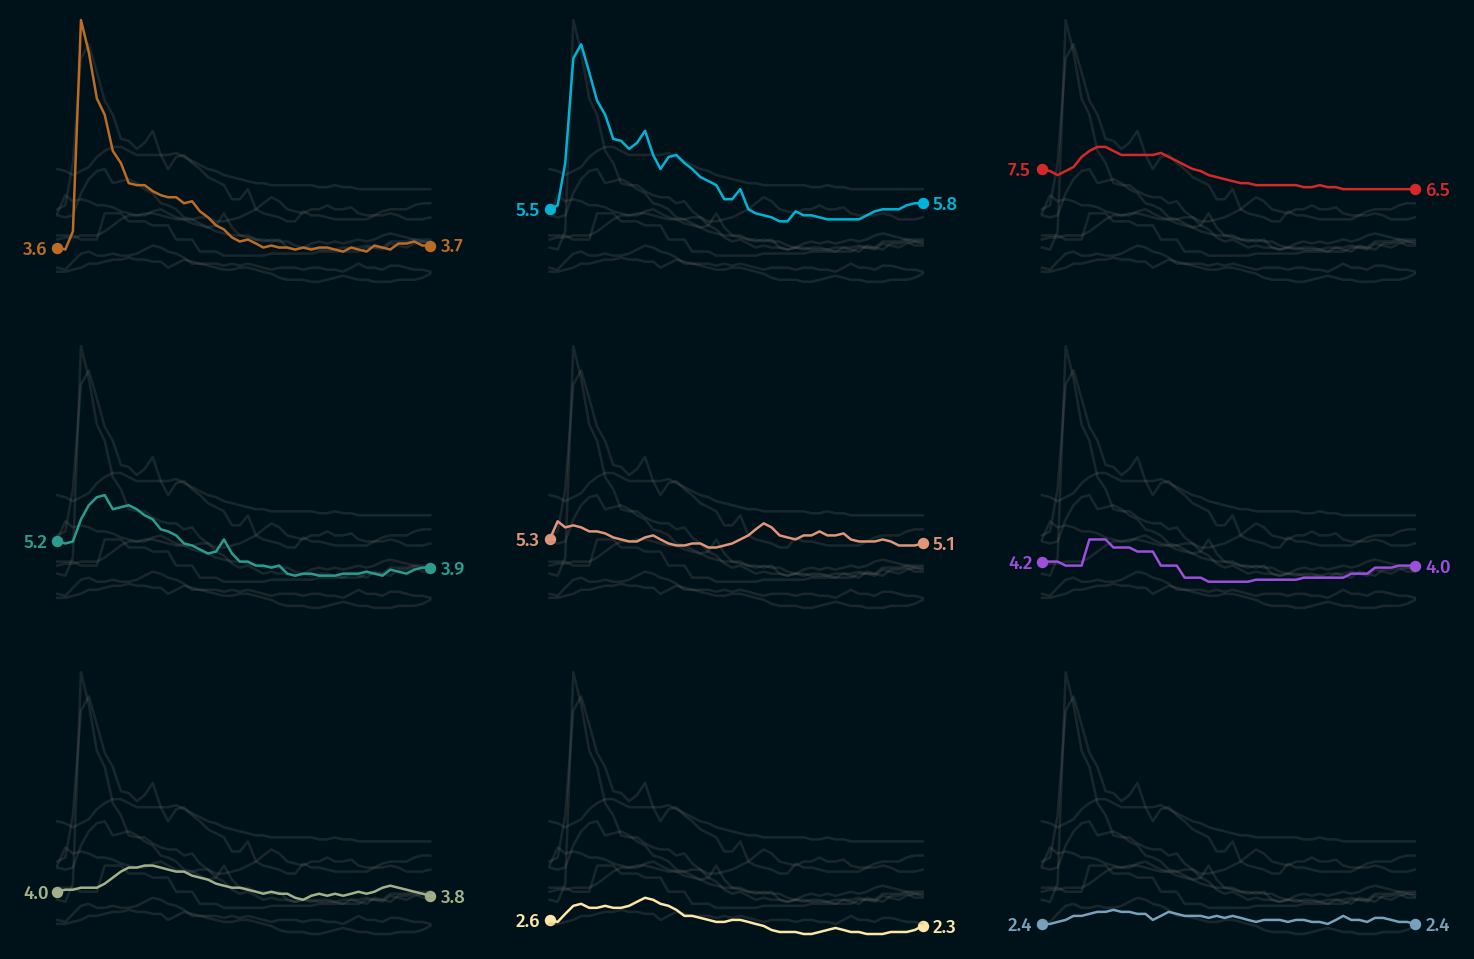

In [6]:
# parameters
dpi = 150
category = 'country'
year = 'date'
value = 'unemployment rate'
background_color = '#001219'
linewidth_main = 1.2
colors = [
    '#bc6c25','#00b4d8','#d62828',
    '#2a9d8f','#e29578','#9d4edd',
    '#a3b18a','#ffe6a7','#78a1bb'
]

# font
personal_path = '/Users/josephbarbier/Library/Fonts/'
font_path = personal_path + 'FiraSans-Light.ttf'
font = FontProperties(fname=font_path)
bold_font = FontProperties(fname=personal_path + 'FiraSans-Medium.ttf')

countries = df.groupby(category)[value].max().sort_values(ascending=False).index.tolist()

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 8), dpi=dpi)
fig.set_facecolor(background_color)

for i, (group, ax) in enumerate(zip(countries, axs.flat)):

   # Set the background color
   ax.set_facecolor(background_color)

   # filter main and other groups
   filtered_df = df[df[category] == group]
   other_groups = df[category].unique()[df[category].unique() != group]

   # Plot other groups with lighter colors
   for other_group in other_groups:
      other_y = df[value][df[category] == other_group]
      other_x = df[year][df[category] == other_group]
      ax.plot(other_x, other_y, color='grey', alpha=0.2, linewidth=linewidth_main)

   # Plot the main group
   x = filtered_df[year]
   y = filtered_df[value]
   ax.plot(x, y, color=colors[i], linewidth=linewidth_main, zorder=10)

   # Custom axes
   ax.set_axis_off()
   ax.set_ylim(df[value].min()-0.2, df[value].max()+0.3)

   # Plot first and last data point
   filtered_df = filtered_df.sort_values(by=year)
   last_value = filtered_df.iloc[-1][value]
   last_date = filtered_df.iloc[-1][year]
   first_value = filtered_df.iloc[0][value]
   first_date = filtered_df.iloc[0][year]
   ax.scatter(
      [first_date, last_date],
      [first_value, last_value],
      s=20, color=colors[i],
   )
   ax_text(
      last_date + pd.Timedelta(days=40), last_value+0.4,
      f'{round(last_value,1)}',
      fontsize=9, color=colors[i],
      font=bold_font,
      ax=ax
   )
   ax_text(
      first_date - pd.Timedelta(days=130), first_value+0.4,
      f'{round(first_value,1)}',
      fontsize=9, color=colors[i],
      font=bold_font,
      ax=ax
   )

plt.show()

## Highlight the USA and Canada

In order to highlight the USA and Canada, we add a `if group in ['united states', 'canada']:` statement inside the `for` loop. This way, we can apply a **different style** to these two countries.

In practice we add another dot and another text annotation at their **highest value**.


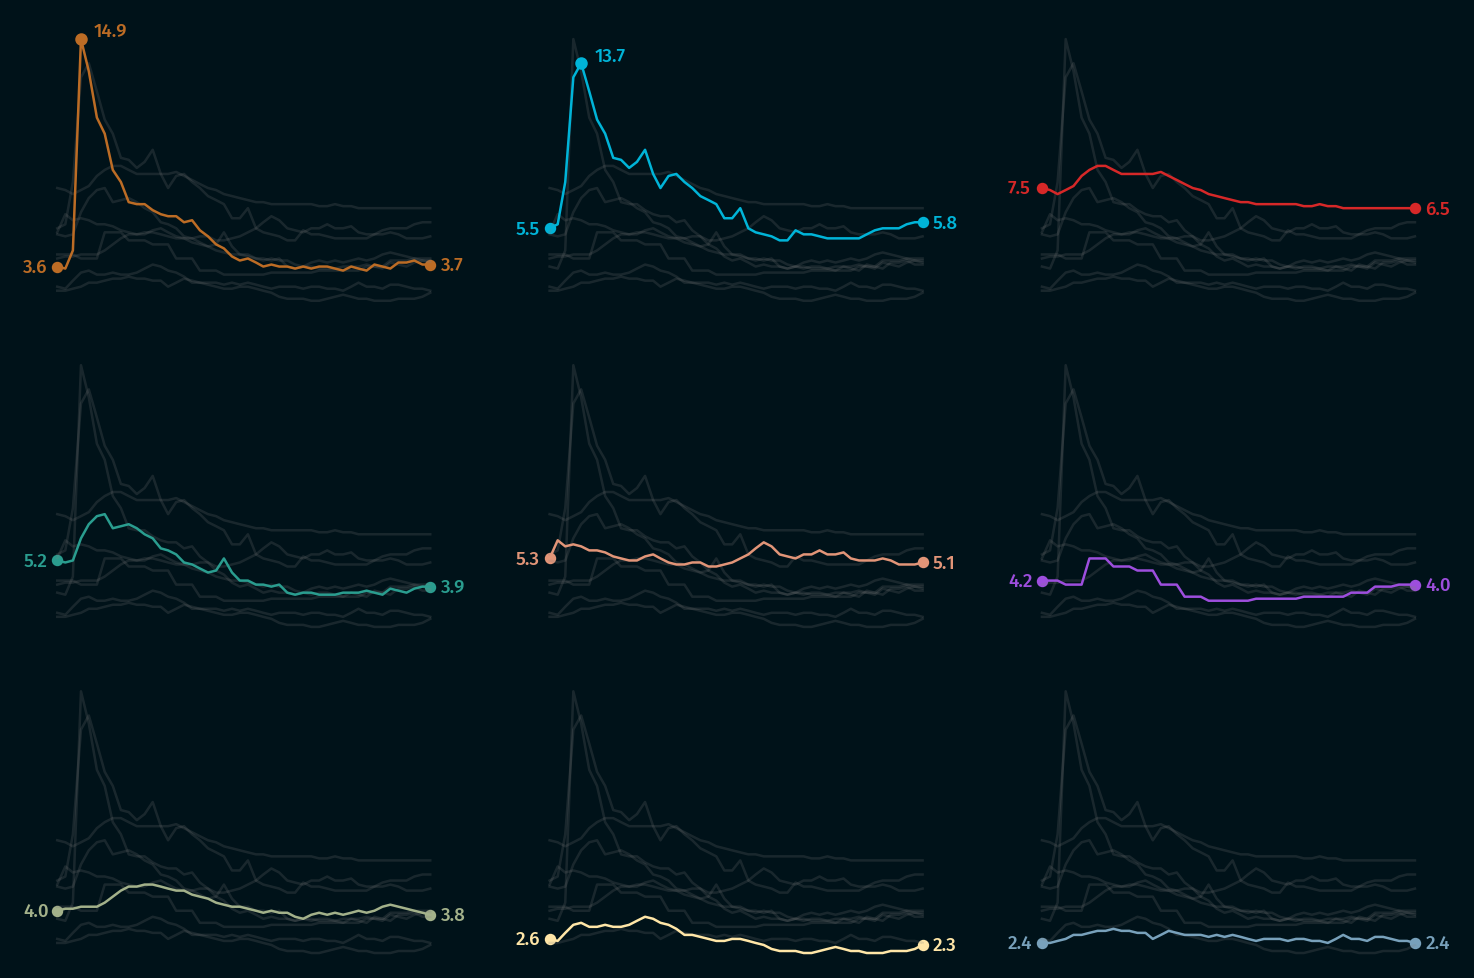

In [7]:
# parameters
dpi = 150
category = 'country'
year = 'date'
value = 'unemployment rate'
background_color = '#001219'
linewidth_main = 1.2
colors = [
    '#bc6c25','#00b4d8','#d62828',
    '#2a9d8f','#e29578','#9d4edd',
    '#a3b18a','#ffe6a7','#78a1bb'
]

# font
personal_path = '/Users/josephbarbier/Library/Fonts/'
font_path = personal_path + 'FiraSans-Light.ttf'
font = FontProperties(fname=font_path)
bold_font = FontProperties(fname=personal_path + 'FiraSans-Medium.ttf')

countries = df.groupby(category)[value].max().sort_values(ascending=False).index.tolist()

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 8), dpi=dpi)
fig.set_facecolor(background_color)

for i, (group, ax) in enumerate(zip(countries, axs.flat)):

   # Set the background color
   ax.set_facecolor(background_color)

   # filter main and other groups
   filtered_df = df[df[category] == group]
   other_groups = df[category].unique()[df[category].unique() != group]

   # Plot other groups with lighter colors
   for other_group in other_groups:
      other_y = df[value][df[category] == other_group]
      other_x = df[year][df[category] == other_group]
      ax.plot(other_x, other_y, color='grey', alpha=0.2, linewidth=linewidth_main)

   # Plot the main group
   x = filtered_df[year]
   y = filtered_df[value]
   ax.plot(x, y, color=colors[i], linewidth=linewidth_main, zorder=10)

   # Custom axes
   ax.set_axis_off()
   ax.set_ylim(df[value].min()-0.2, df[value].max()+0.3)

   # Plot first and last data point
   filtered_df = filtered_df.sort_values(by=year)
   last_value = filtered_df.iloc[-1][value]
   last_date = filtered_df.iloc[-1][year]
   first_value = filtered_df.iloc[0][value]
   first_date = filtered_df.iloc[0][year]
   ax.scatter(
      [first_date, last_date],
      [first_value, last_value],
      s=20, color=colors[i],
   )
   ax_text(
      last_date + pd.Timedelta(days=40), last_value+0.4,
      f'{round(last_value,1)}',
      fontsize=9, color=colors[i],
      font=bold_font,
      ax=ax
   )
   ax_text(
      first_date - pd.Timedelta(days=130), first_value+0.4,
      f'{round(first_value,1)}',
      fontsize=9, color=colors[i],
      font=bold_font,
      ax=ax
   )

   # add USA and Canada max value
   if group in ['united states', 'canada']:
      maxrate = df[df['country']==group][value].max()
      date_maxrate = df[(df['country']==group) & (df['unemployment rate']==maxrate)][year]
      ax.plot(
         date_maxrate, maxrate,
         marker='o', markersize=5, color=colors[i], zorder=10
      )
      ax_text(
         date_maxrate + pd.Timedelta(days=50), maxrate+0.8,
         f'{round(maxrate,1)}',
         fontsize=9, color=colors[i],
         font=bold_font,
         ax=ax
      )

plt.show()

## Add country name

Then, we add the **country name** at the top of each subplot. This is done using the `ax_text()` function from the [highlight_text](/advanced-custom-annotations-matplotlib) library.


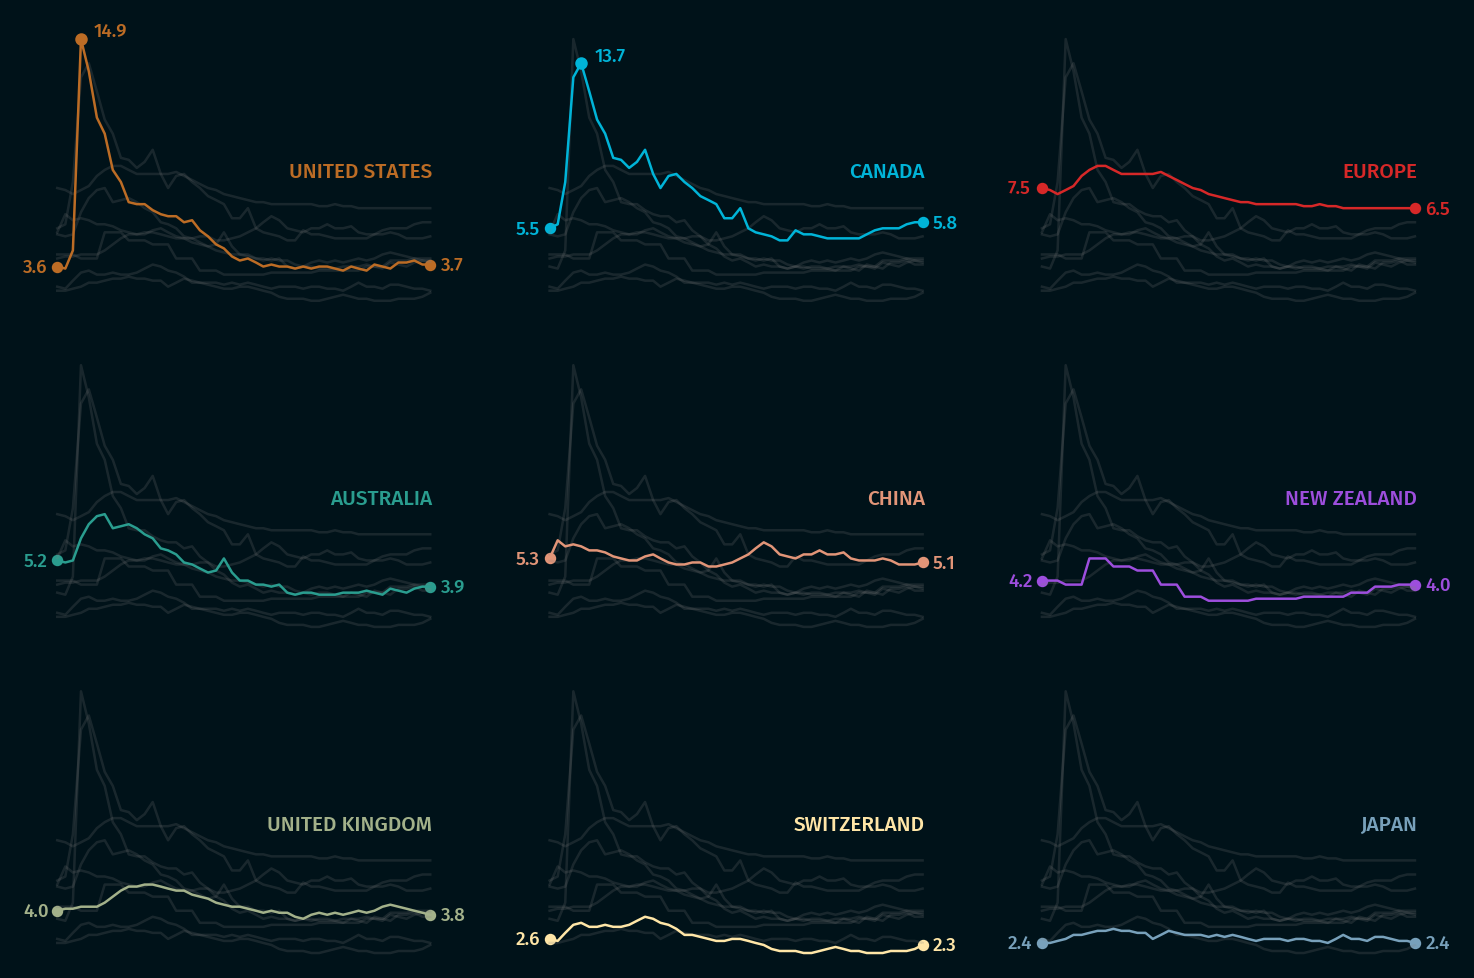

In [8]:
# parameters
dpi = 150
category = 'country'
year = 'date'
value = 'unemployment rate'
background_color = '#001219'
linewidth_main = 1.2
y_adj = 4 # make country names higher
colors = [
    '#bc6c25','#00b4d8','#d62828',
    '#2a9d8f','#e29578','#9d4edd',
    '#a3b18a','#ffe6a7','#78a1bb'
]

# font
personal_path = '/Users/josephbarbier/Library/Fonts/'
font_path = personal_path + 'FiraSans-Light.ttf'
font = FontProperties(fname=font_path)
bold_font = FontProperties(fname=personal_path + 'FiraSans-Medium.ttf')

countries = df.groupby(category)[value].max().sort_values(ascending=False).index.tolist()

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 8), dpi=dpi)
fig.set_facecolor(background_color)

for i, (group, ax) in enumerate(zip(countries, axs.flat)):

   # Set the background color
   ax.set_facecolor(background_color)

   # filter main and other groups
   filtered_df = df[df[category] == group]
   other_groups = df[category].unique()[df[category].unique() != group]

   # Plot other groups with lighter colors
   for other_group in other_groups:
      other_y = df[value][df[category] == other_group]
      other_x = df[year][df[category] == other_group]
      ax.plot(other_x, other_y, color='grey', alpha=0.2, linewidth=linewidth_main)

   # Plot the main group
   x = filtered_df[year]
   y = filtered_df[value]
   ax.plot(x, y, color=colors[i], linewidth=linewidth_main, zorder=10)

   # Custom axes
   ax.set_axis_off()
   ax.set_ylim(df[value].min()-0.2, df[value].max()+0.3)

   # Plot first and last data point
   filtered_df = filtered_df.sort_values(by=year)
   last_value = filtered_df.iloc[-1][value]
   last_date = filtered_df.iloc[-1][year]
   first_value = filtered_df.iloc[0][value]
   first_date = filtered_df.iloc[0][year]
   ax.scatter(
      [first_date, last_date],
      [first_value, last_value],
      s=20, color=colors[i],
   )
   ax_text(
      last_date + pd.Timedelta(days=40), last_value+0.4,
      f'{round(last_value,1)}',
      fontsize=9, color=colors[i],
      font=bold_font,
      ax=ax
   )
   ax_text(
      first_date - pd.Timedelta(days=130), first_value+0.4,
      f'{round(first_value,1)}',
      fontsize=9, color=colors[i],
      font=bold_font,
      ax=ax
   )

   # add USA and Canada max value
   if group in ['united states', 'canada']:
      maxrate = df[df['country']==group][value].max()
      date_maxrate = df[(df['country']==group) & (df['unemployment rate']==maxrate)][year]
      ax.plot(
         date_maxrate, maxrate,
         marker='o', markersize=5, color=colors[i], zorder=10
      )
      ax_text(
         date_maxrate + pd.Timedelta(days=50), maxrate+0.8,
         f'{round(maxrate,1)}',
         fontsize=9, color=colors[i],
         font=bold_font,
         ax=ax
      )

   # Display country names
   ax_text(
      19700, df[value].mean()+y_adj,
      f'<{group.upper()}>',
      va='top', ha='right',
      fontsize=10, font=bold_font,
      color=colors[i], ax=ax
   )

plt.show()

## Basic annotations: title, credit and reference date

Once again, we simply use the [highlight_text](/advanced-custom-annotations-matplotlib) library to add a **title**, a **credit** and a **reference date** to the plot.


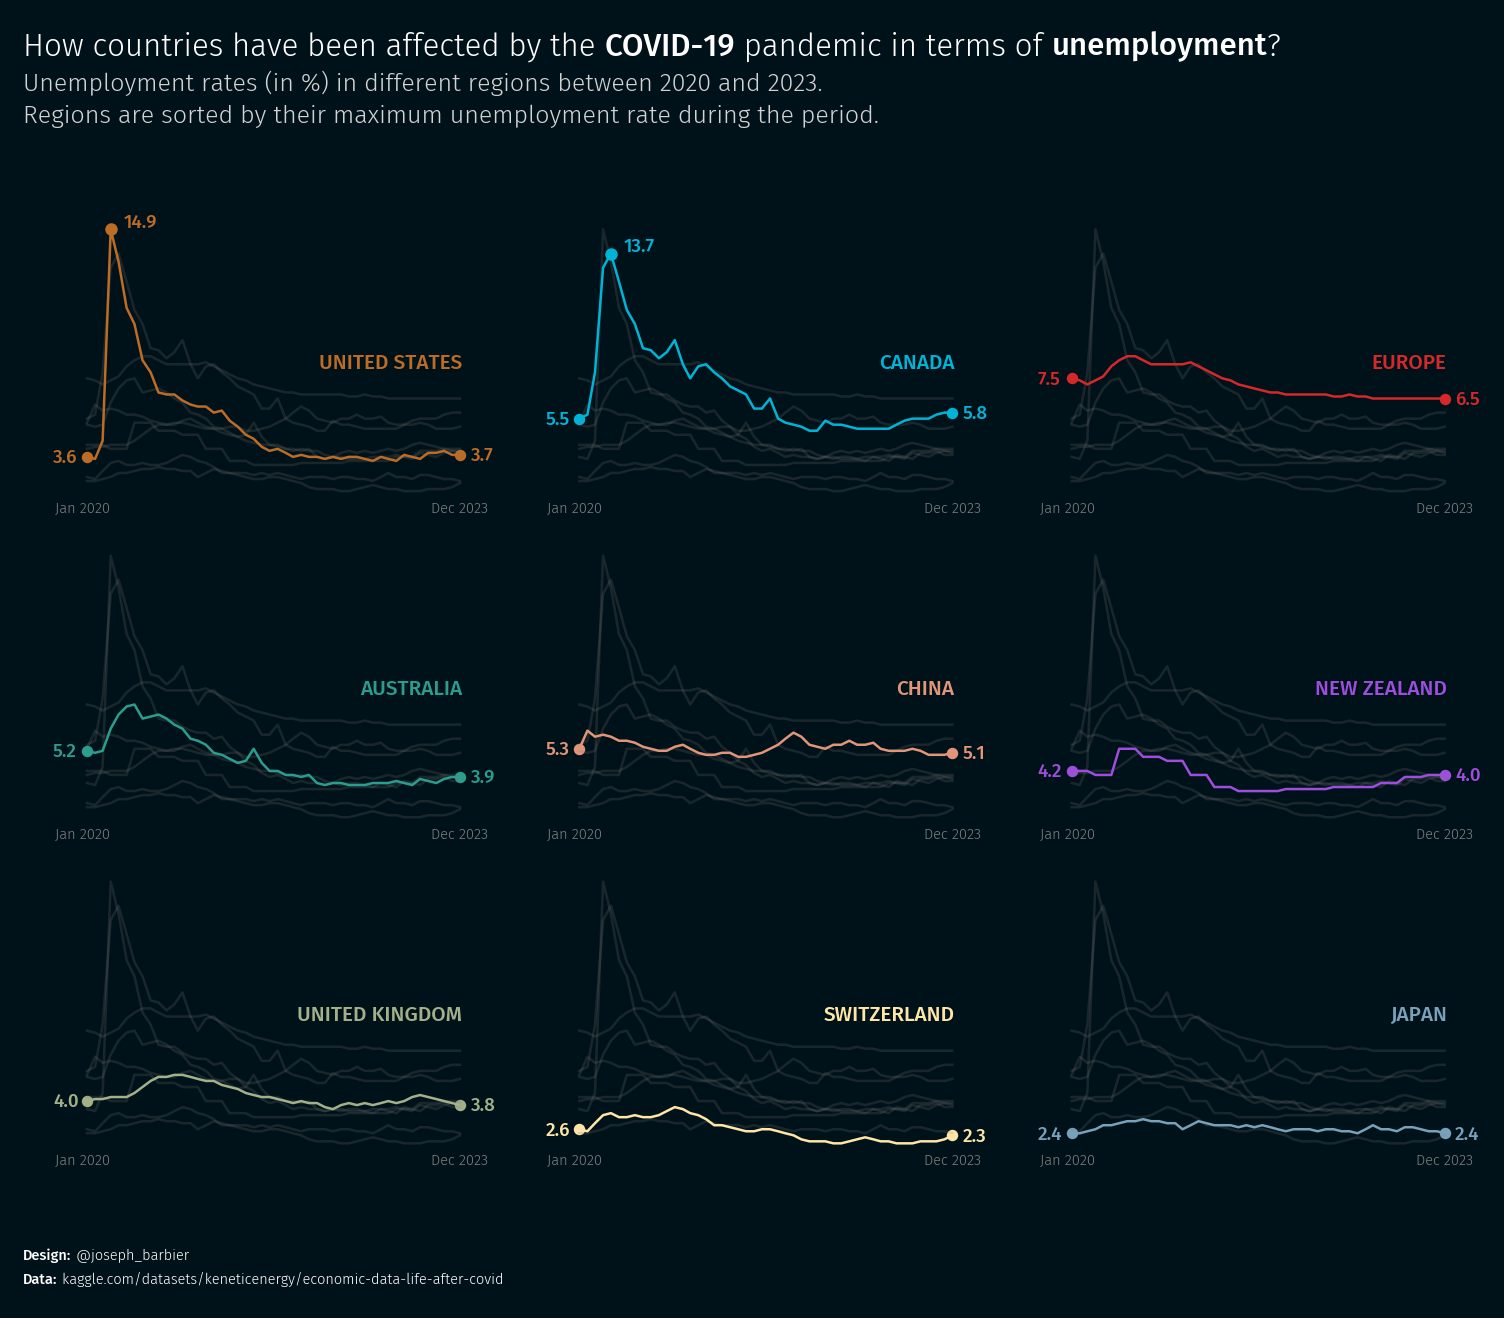

In [9]:
# parameters
dpi = 150
category = 'country'
year = 'date'
value = 'unemployment rate'
background_color = '#001219'
text_color = 'white'
linewidth_main = 1.2
y_adj = 4 # make country names higher
colors = [
    '#bc6c25','#00b4d8','#d62828',
    '#2a9d8f','#e29578','#9d4edd',
    '#a3b18a','#ffe6a7','#78a1bb'
]

# font
personal_path = '/Users/josephbarbier/Library/Fonts/'
font_path = personal_path + 'FiraSans-Light.ttf'
font = FontProperties(fname=font_path)
bold_font = FontProperties(fname=personal_path + 'FiraSans-Medium.ttf')

countries = df.groupby(category)[value].max().sort_values(ascending=False).index.tolist()

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 8), dpi=dpi)
fig.set_facecolor(background_color)

for i, (group, ax) in enumerate(zip(countries, axs.flat)):

   # Set the background color
   ax.set_facecolor(background_color)

   # filter main and other groups
   filtered_df = df[df[category] == group]
   other_groups = df[category].unique()[df[category].unique() != group]

   # Plot other groups with lighter colors
   for other_group in other_groups:
      other_y = df[value][df[category] == other_group]
      other_x = df[year][df[category] == other_group]
      ax.plot(other_x, other_y, color='grey', alpha=0.2, linewidth=linewidth_main)

   # Plot the main group
   x = filtered_df[year]
   y = filtered_df[value]
   ax.plot(x, y, color=colors[i], linewidth=linewidth_main, zorder=10)

   # Custom axes
   ax.set_axis_off()
   ax.set_ylim(df[value].min()-0.2, df[value].max()+0.3)

   # Plot first and last data point
   filtered_df = filtered_df.sort_values(by=year)
   last_value = filtered_df.iloc[-1][value]
   last_date = filtered_df.iloc[-1][year]
   first_value = filtered_df.iloc[0][value]
   first_date = filtered_df.iloc[0][year]
   ax.scatter(
      [first_date, last_date],
      [first_value, last_value],
      s=20, color=colors[i],
   )
   ax_text(
      last_date + pd.Timedelta(days=40), last_value+0.4,
      f'{round(last_value,1)}',
      fontsize=9, color=colors[i],
      font=bold_font,
      ax=ax
   )
   ax_text(
      first_date - pd.Timedelta(days=130), first_value+0.4,
      f'{round(first_value,1)}',
      fontsize=9, color=colors[i],
      font=bold_font,
      ax=ax
   )

   # add USA and Canada max value
   if group in ['united states', 'canada']:
      maxrate = df[df['country']==group][value].max()
      date_maxrate = df[(df['country']==group) & (df['unemployment rate']==maxrate)][year]
      ax.plot(
         date_maxrate, maxrate,
         marker='o', markersize=5, color=colors[i], zorder=10
      )
      ax_text(
         date_maxrate + pd.Timedelta(days=50), maxrate+0.8,
         f'{round(maxrate,1)}',
         fontsize=9, color=colors[i],
         font=bold_font,
         ax=ax
      )

   # Display country names
   ax_text(
      19700, df[value].mean()+y_adj,
      f'<{group.upper()}>',
      va='top', ha='right',
      fontsize=10, font=bold_font,
      color=colors[i], ax=ax
   )

   # Reference dates (Jan 2020 and Dec 2023)
   ax_text(
      18350, df[value].min()-0.5,
      'Jan 2020',
      va='top', ha='right',
      fontsize=7, font=font,
      color='grey', ax=ax
   )
   ax_text(
      19800, df[value].min()-0.5,
      'Dec 2023',
      va='top', ha='right',
      fontsize=7, font=font,
      color='grey', ax=ax
   )

# credit
credit = """
<Design:> @joseph_barbier
<Data:> kaggle.com/datasets/keneticenergy/economic-data-life-after-covid
"""
fig_text(
   0.1, 0.01,
   credit,
   fontsize=7,
   ha='left', va='center',
   color=text_color, font=font,
   highlight_textprops=[
      {'font': bold_font},
      {'font': bold_font}
   ],
   fig=fig
)

# title
start_x_position = df.iloc[0][year]
end_x_position = df.iloc[-1][year]
title = f"""
Evolution of <{value}> between <{str(start_x_position)[:4]}> and <{str(end_x_position)[:4]}>
"""
title = f"""
How countries have been affected by the <COVID-19> pandemic in terms of <unemployment>?
<Unemployment rates (in %) in different regions between 2020 and 2023.>
<Regions are sorted by their maximum unemployment rate during the period.>
"""
fig_text(
   0.1, 1,
   title,
   fontsize=15,
   ha='left', va='center',
   color=text_color, font=font,
   highlight_textprops=[
      {'font': bold_font},
      {'font': bold_font},
      {'color': 'lightgrey', 'fontsize': 12},
      {'color': 'lightgrey', 'fontsize': 12}
   ],
   fig=fig
)

plt.show()

## Final chart with annotations


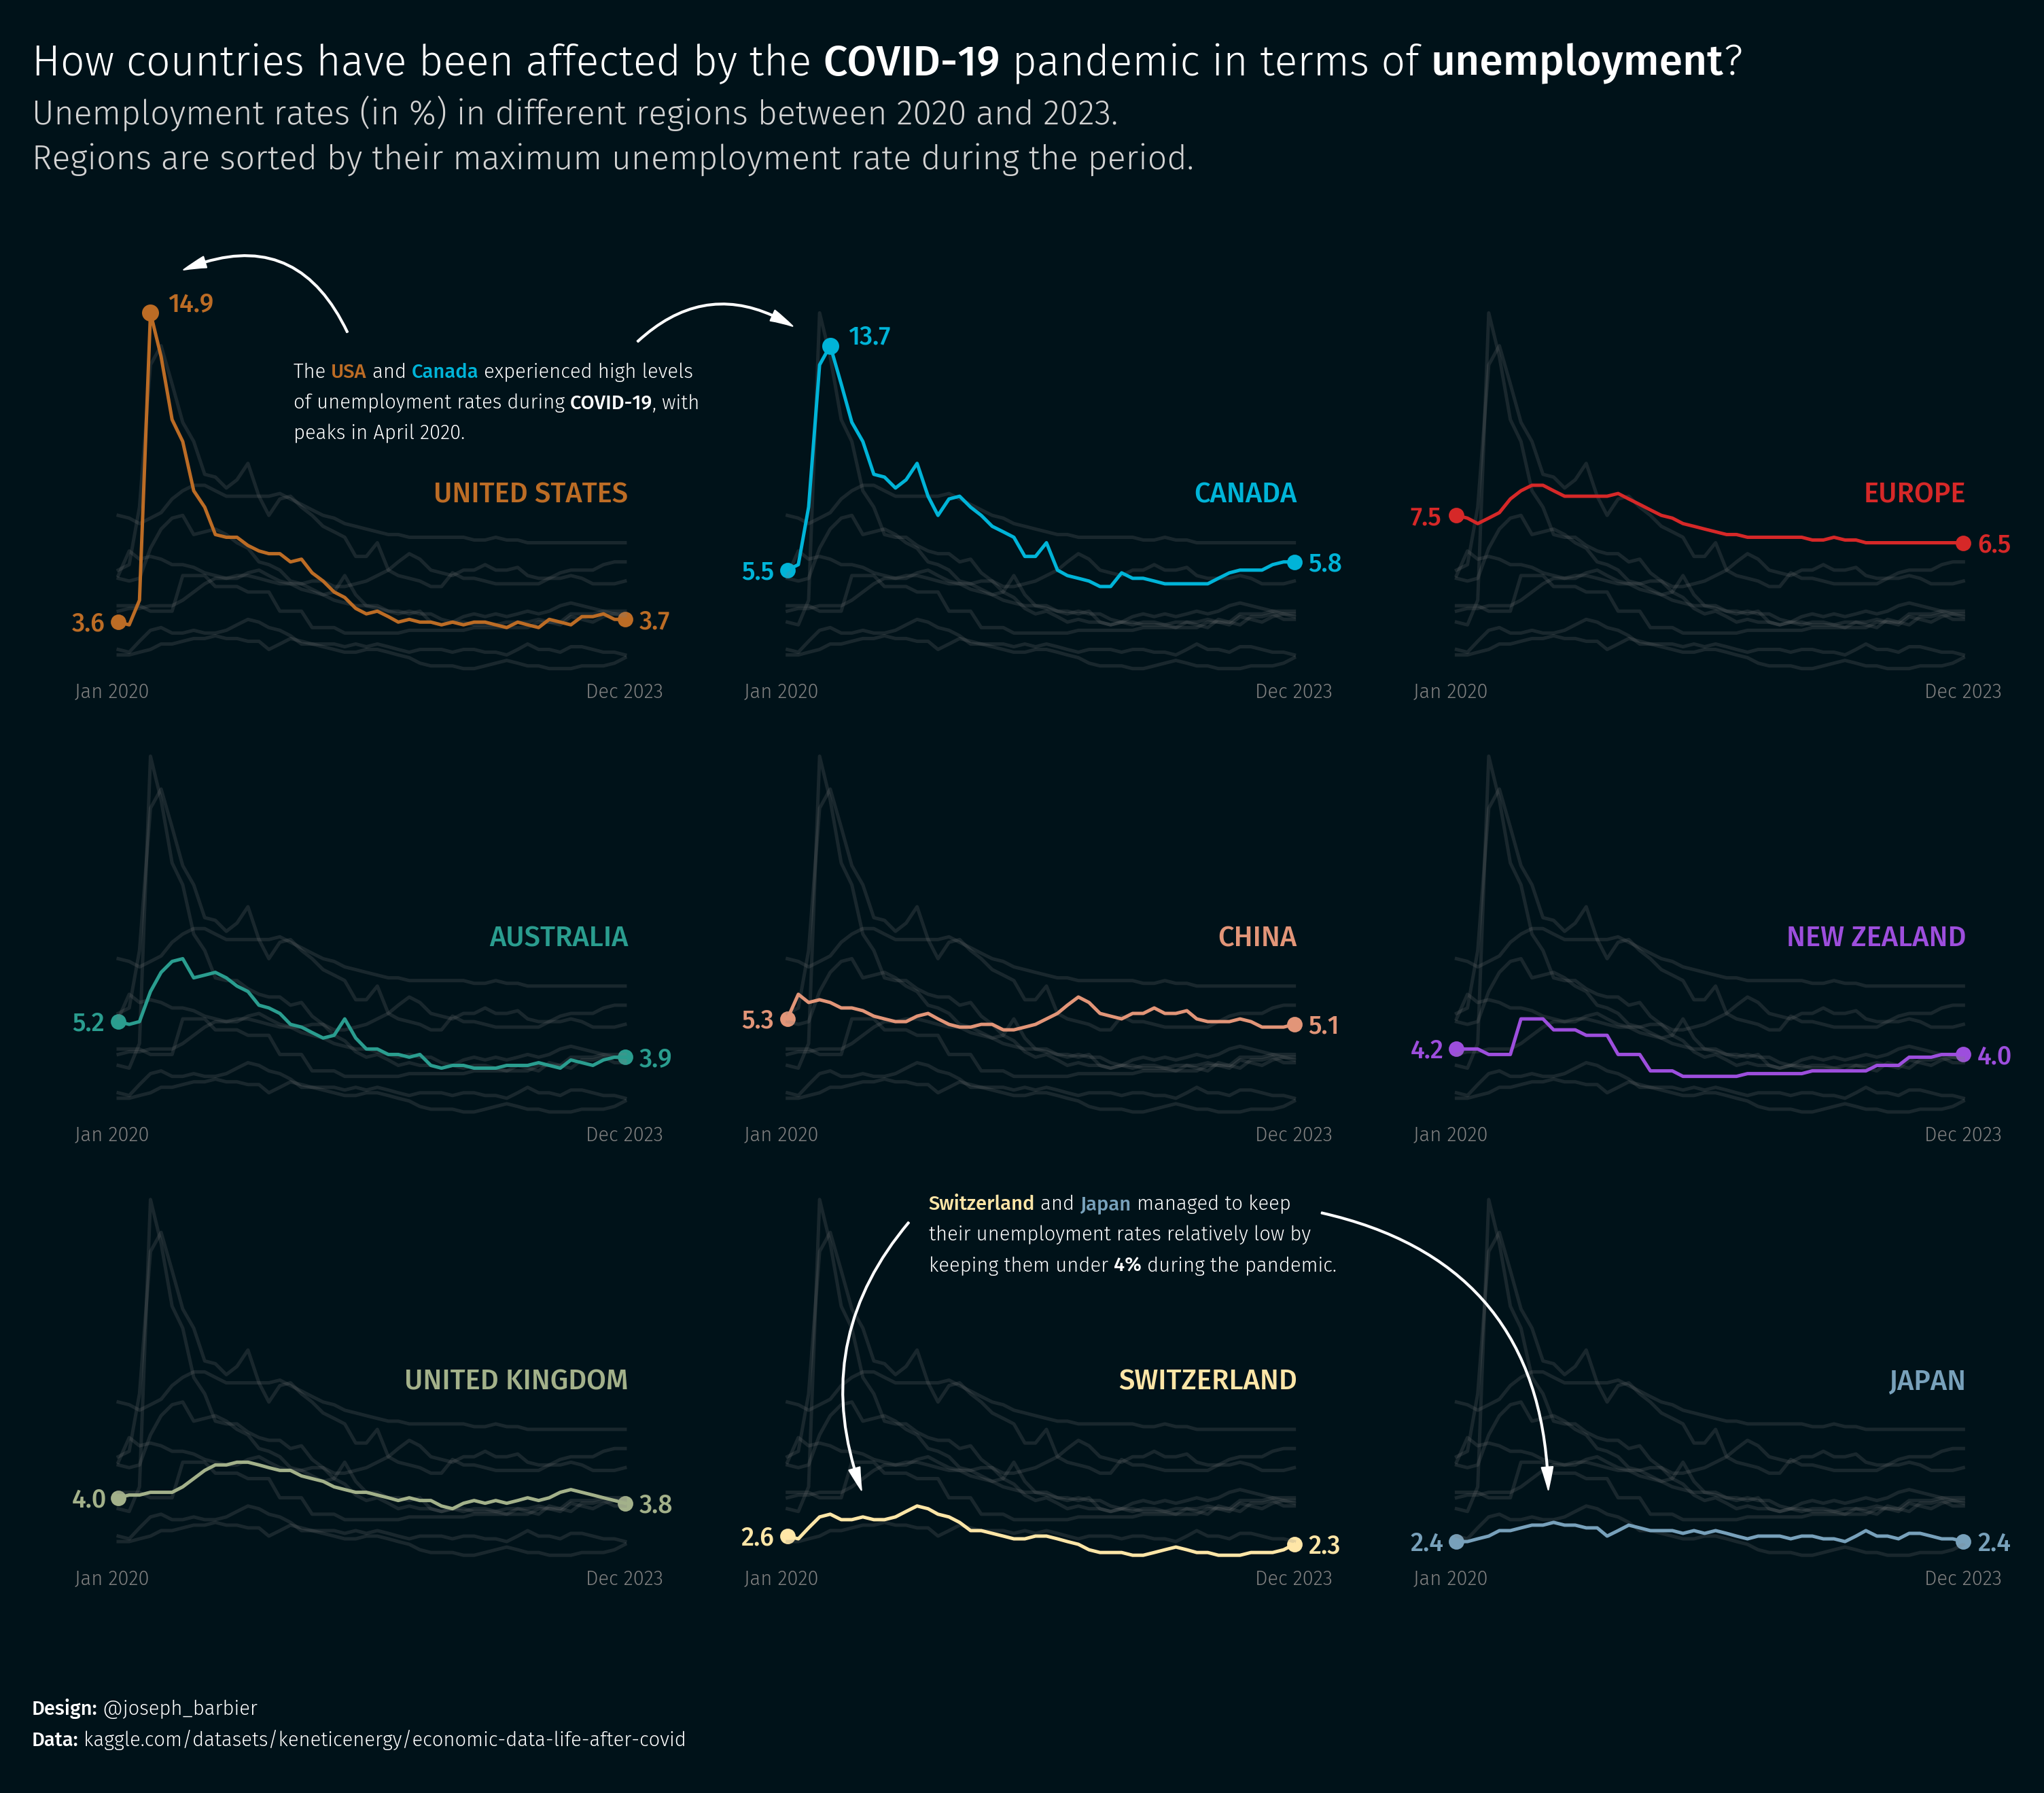

In [12]:
# parameters
dpi = 300
category = 'country'
year = 'date'
value = 'unemployment rate'
background_color = '#001219'
text_color = 'white'
linewidth_main = 1.2
y_adj = 4
colors = [
    '#bc6c25','#00b4d8','#d62828',
    '#2a9d8f','#e29578','#9d4edd',
    '#a3b18a','#ffe6a7','#78a1bb'
]

# font
personal_path = '/Users/josephbarbier/Library/Fonts/'
font_path = personal_path + 'FiraSans-Light.ttf'
font = FontProperties(fname=font_path)
bold_font = FontProperties(fname=personal_path + 'FiraSans-Medium.ttf')

fig, axs = plt.subplots(3, 3, figsize=(12, 8), dpi=dpi)
fig.set_facecolor(background_color)

# default order for the countries
countries = df[category].unique()

# custom order for the countries
countries = df.groupby('country')['unemployment rate'].max().sort_values(ascending=False).index.tolist()

for i, (group, ax) in enumerate(zip(countries, axs.flat)):

   # Set the background color
   ax.set_facecolor(background_color)

   # Filter for the group
   filtered_df = df[df[category] == group]
   other_groups = df[category].unique()[df[category].unique() != group]

   # Plot last data point
   filtered_df = filtered_df.sort_values(by=year)
   last_value = filtered_df.iloc[-1][value]
   last_date = filtered_df.iloc[-1][year]
   first_value = filtered_df.iloc[0][value]
   first_date = filtered_df.iloc[0][year]
   ax.scatter(
      [first_date, last_date],
      [first_value, last_value],
      s=20, color=colors[i],
   )
   ax_text(
      last_date + pd.Timedelta(days=40), last_value+0.4,
      f'{round(last_value,1)}',
      fontsize=9, color=colors[i],
      font=bold_font,
      ax=ax
   )
   ax_text(
      first_date - pd.Timedelta(days=130), first_value+0.4,
      f'{round(first_value,1)}',
      fontsize=9, color=colors[i],
      font=bold_font,
      ax=ax
   )

   # Plot other groups with lighter colors
   for other_group in other_groups:
      other_y = df[value][df[category] == other_group]
      other_x = df[year][df[category] == other_group]
      ax.plot(other_x, other_y, color='grey', alpha=0.2, linewidth=linewidth_main)

   # Plot the main group
   x = filtered_df[year]
   y = filtered_df[value]
   ax.plot(x, y, color=colors[i], linewidth=linewidth_main, zorder=10)

   # add USA and Canada max value
   if group in ['united states', 'canada']:
      maxrate = df[df['country']==group][value].max()
      date_maxrate = df[(df['country']==group) & (df['unemployment rate']==maxrate)][year]
      ax.plot(
         date_maxrate, maxrate,
         marker='o', markersize=5, color=colors[i], zorder=10
      )
      ax_text(
         date_maxrate + pd.Timedelta(days=50), maxrate+0.8,
         f'{round(maxrate,1)}',
         fontsize=9, color=colors[i],
         font=bold_font,
         ax=ax
      )


   # Custom axes
   ax.set_axis_off()
   ax.set_ylim(df[value].min()-0.2, df[value].max()+0.3)

   # Display country names
   ax_text(
      19700, df[value].mean()+y_adj,
      f'<{group.upper()}>',
      va='top', ha='right',
      fontsize=10, font=bold_font,
      color=colors[i], ax=ax
   )

   # Reference dates (Jan 2020 and Dec 2023)
   ax_text(
      18350, df[value].min()-0.5,
      'Jan 2020',
      va='top', ha='right',
      fontsize=7, font=font,
      color='grey', ax=ax
   )
   ax_text(
      19800, df[value].min()-0.5,
      'Dec 2023',
      va='top', ha='right',
      fontsize=7, font=font,
      color='grey', ax=ax
   )

# credit
credit = """
<Design:> @joseph_barbier
<Data:> kaggle.com/datasets/keneticenergy/economic-data-life-after-covid
"""
fig_text(
   0.1, 0.01,
   credit,
   fontsize=7,
   ha='left', va='center',
   color=text_color, font=font,
   highlight_textprops=[
      {'font': bold_font},
      {'font': bold_font}
   ],
   fig=fig
)

# title
start_x_position = df.iloc[0][year]
end_x_position = df.iloc[-1][year]
title = f"""
Evolution of <{value}> between <{str(start_x_position)[:4]}> and <{str(end_x_position)[:4]}>
"""
title = f"""
How countries have been affected by the <COVID-19> pandemic in terms of <unemployment>?
<Unemployment rates (in %) in different regions between 2020 and 2023.>
<Regions are sorted by their maximum unemployment rate during the period.>
"""
fig_text(
   0.1, 1,
   title,
   fontsize=15,
   ha='left', va='center',
   color=text_color, font=font,
   highlight_textprops=[
      {'font': bold_font},
      {'font': bold_font},
      {'color': 'lightgrey', 'fontsize': 12},
      {'color': 'lightgrey', 'fontsize': 12}
   ],
   fig=fig
)

# arrow function
def draw_arrow(tail_position, head_position, invert=False, radius=0.5):
    kw = dict(arrowstyle="Simple, tail_width=0.5, head_width=4, head_length=8", color=text_color, lw=0.5)
    if invert:
        connectionstyle = f"arc3,rad=-{radius}"
    else:
        connectionstyle = f"arc3,rad={radius}"
    a = FancyArrowPatch(
        tail_position, head_position,
        connectionstyle=connectionstyle,
        transform=fig.transFigure,
        **kw
    )
    fig.patches.append(a)

# arrows for the USA and Canada
draw_arrow((0.23, 0.86), (0.16, 0.9), invert=False, radius=0.5)
draw_arrow((0.346, 0.855), (0.413, 0.865), invert=True, radius=0.4)
maxrate_canada = df[df['country']=='canada']['unemployment rate'].max()
maxrate_usa = df[df['country']=='united states']['unemployment rate'].max()
text = f"""
The <USA> and <Canada> experienced high levels
of unemployment rates during <COVID-19>, with
peaks in April 2020.
"""
fig_text(
   0.29, 0.82,
   text,
   fontsize=7,
   ha='center', va='center',
   color=text_color, font=font,
   highlight_textprops=[
      {'color': colors[0], 'font':bold_font},
      {'color': colors[1], 'font':bold_font},
      {'font': bold_font}
   ],
   fig=fig
)

# arrows for Japan and Switzerland
draw_arrow((0.625, 0.324), (0.72, 0.15), invert=True, radius=0.4)
draw_arrow((0.46, 0.32), (0.44, 0.15), invert=False, radius=0.3)
text = f"""
<Switzerland> and <Japan> managed to keep
their unemployment rates relatively low by
keeping them under <4%> during the pandemic.
"""
fig_text(
   0.55, 0.31,
   text,
   fontsize=7,
   ha='center', va='center',
   color=text_color, font=font,
   highlight_textprops=[
      {'color': colors[7], 'font':bold_font},
      {'color': colors[8], 'font':bold_font},
      {'font': bold_font},
   ],
   fig=fig
)

fig.savefig(f'../../static/graph/web-small-multiple-with-highlights.png', bbox_inches='tight', dpi=dpi)
plt.show()

## Going further

You migth be interested in:

- this beautiful small [multiple connected scatter plot](/web-highlighted-lineplot-with-faceting)
- this [small multiple line chart](/web-line-chart-small-multiple) with reference lines
